In [1]:
%load_ext autoreload
%autoreload 2
from misc import *
import matplotlib.pyplot as plt

In [12]:
periods = 100
ppp = 10**3
states, covs, signals, params = load_data(ppp=ppp, periods=periods, method="rossler")
statesE, covsE, signalsE, params = load_data(ppp=ppp, periods=periods, method="euler")

#states, covs, signals, [A,dt,C,D], params = load_data(periods=periods, ppp=ppp, itraj=itraj,method="RK4")
eta, gamma, Lambda, omega, n = params
[A,C,D] = build_matrix_from_params(params)

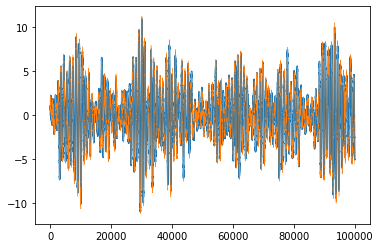

In [15]:
plt.plot(states[:,0])
plt.plot(statesE[:,0], linewidth=0.4)

Let's check the deterministic (I put 101 periods, ppp= 1000, and multiply by zero the G matrix). Also I use the "wrong" A (which is $\omega$*Simplectic), and gamma != 0.

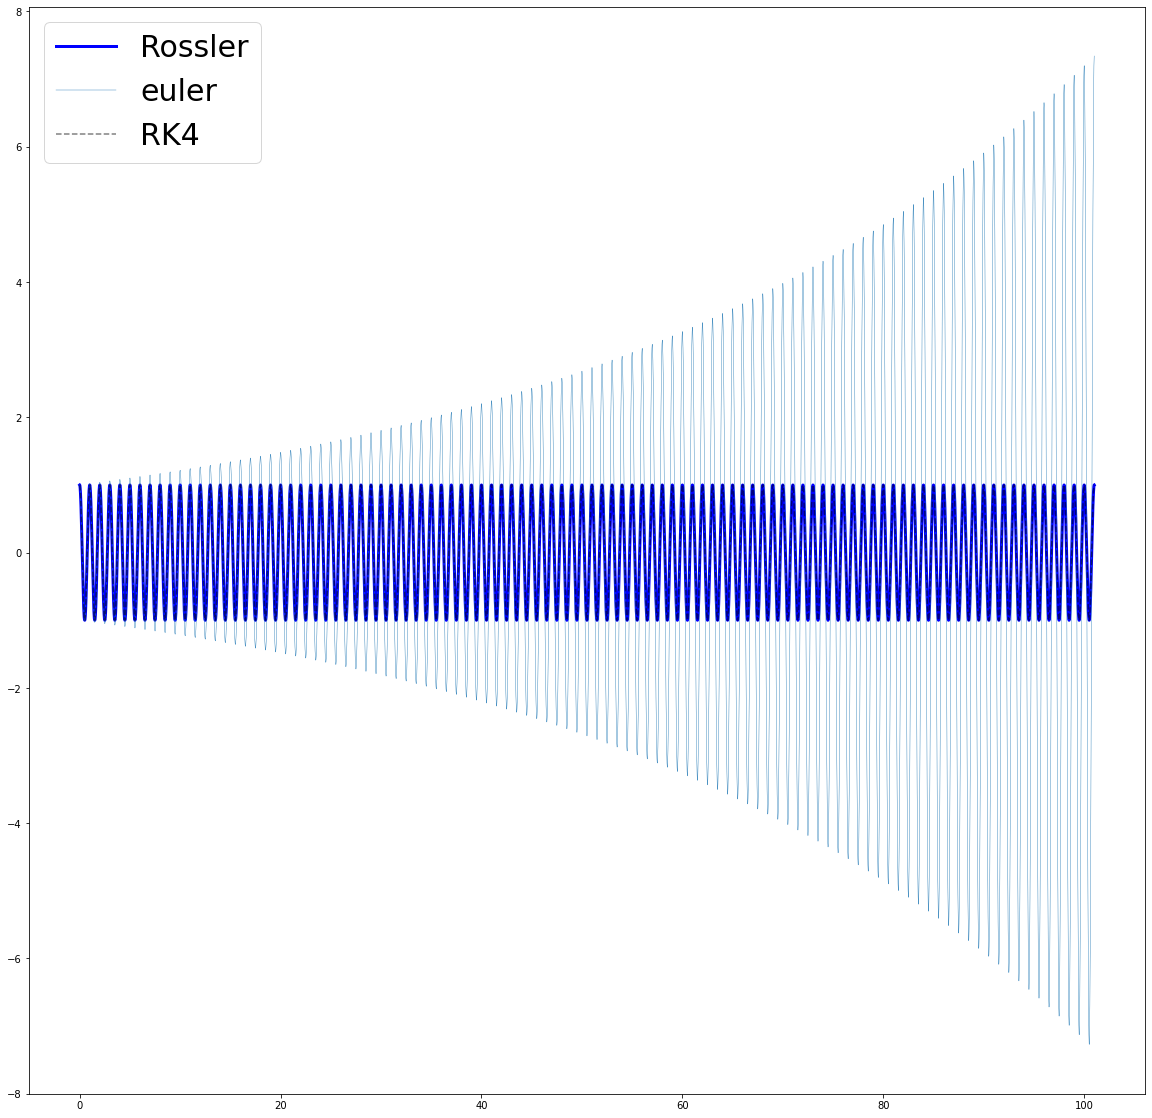

In [33]:
periods = 101
ppp = 10**3
states, covs, signals, params,times = load_data(ppp=ppp, periods=periods, method="rossler")
statesE, covsE, signalsE, params,times = load_data(ppp=ppp, periods=periods, method="euler")
statesRK, covsRK, signalsRK, params,times = load_data(ppp=ppp, periods=periods, method="RK4")

eta, gamma, Lambda, omega, n = params
[A,C,D] = build_matrix_from_params(params)

plt.figure(figsize=(20,20))
plt.plot(times,states[:,0], color="blue",label="Rossler",linewidth=3, alpha=0.5)
plt.plot(times,statesE[:,0], linewidth=0.4, label="euler")
plt.plot(times,statesRK[:,0],'--', label="RK4", color="black", alpha=0.5)

plt.legend(prop={"size":30})

Checking cosine..

In [59]:
from sdeint import itoSRI2, itoEuler

In [137]:
def f(x,t):
    return np.array([np.cos(omega*t)])

def G(x,t):
    return np.array([[0]])#np.zeros((1,))

In [138]:
omega = 1#2*np.pi
dt = 1
periods=500
times = np.arange(0,periods+dt,dt)

In [139]:
sol = itoSRI2(f,G,np.array([0.]), times)
solEu = itoEuler(f,G,np.array([0.]), times)

In [140]:
def eulerr(x,t,dt,fv,gv):
    return x + (dt*fv(x,t)) + np.sqrt(dt)*gv(t,x)

In [141]:
from tqdm import tqdm
seu = [[0.]]
for ind,t in enumerate(tqdm(times)):
    seu.append(eulerr(seu[ind], t, dt, f, G)[0])

100%|██████████| 501/501 [00:00<00:00, 36315.89it/s]


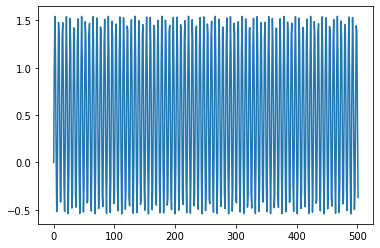

In [142]:
plt.plot(np.squeeze(seu))

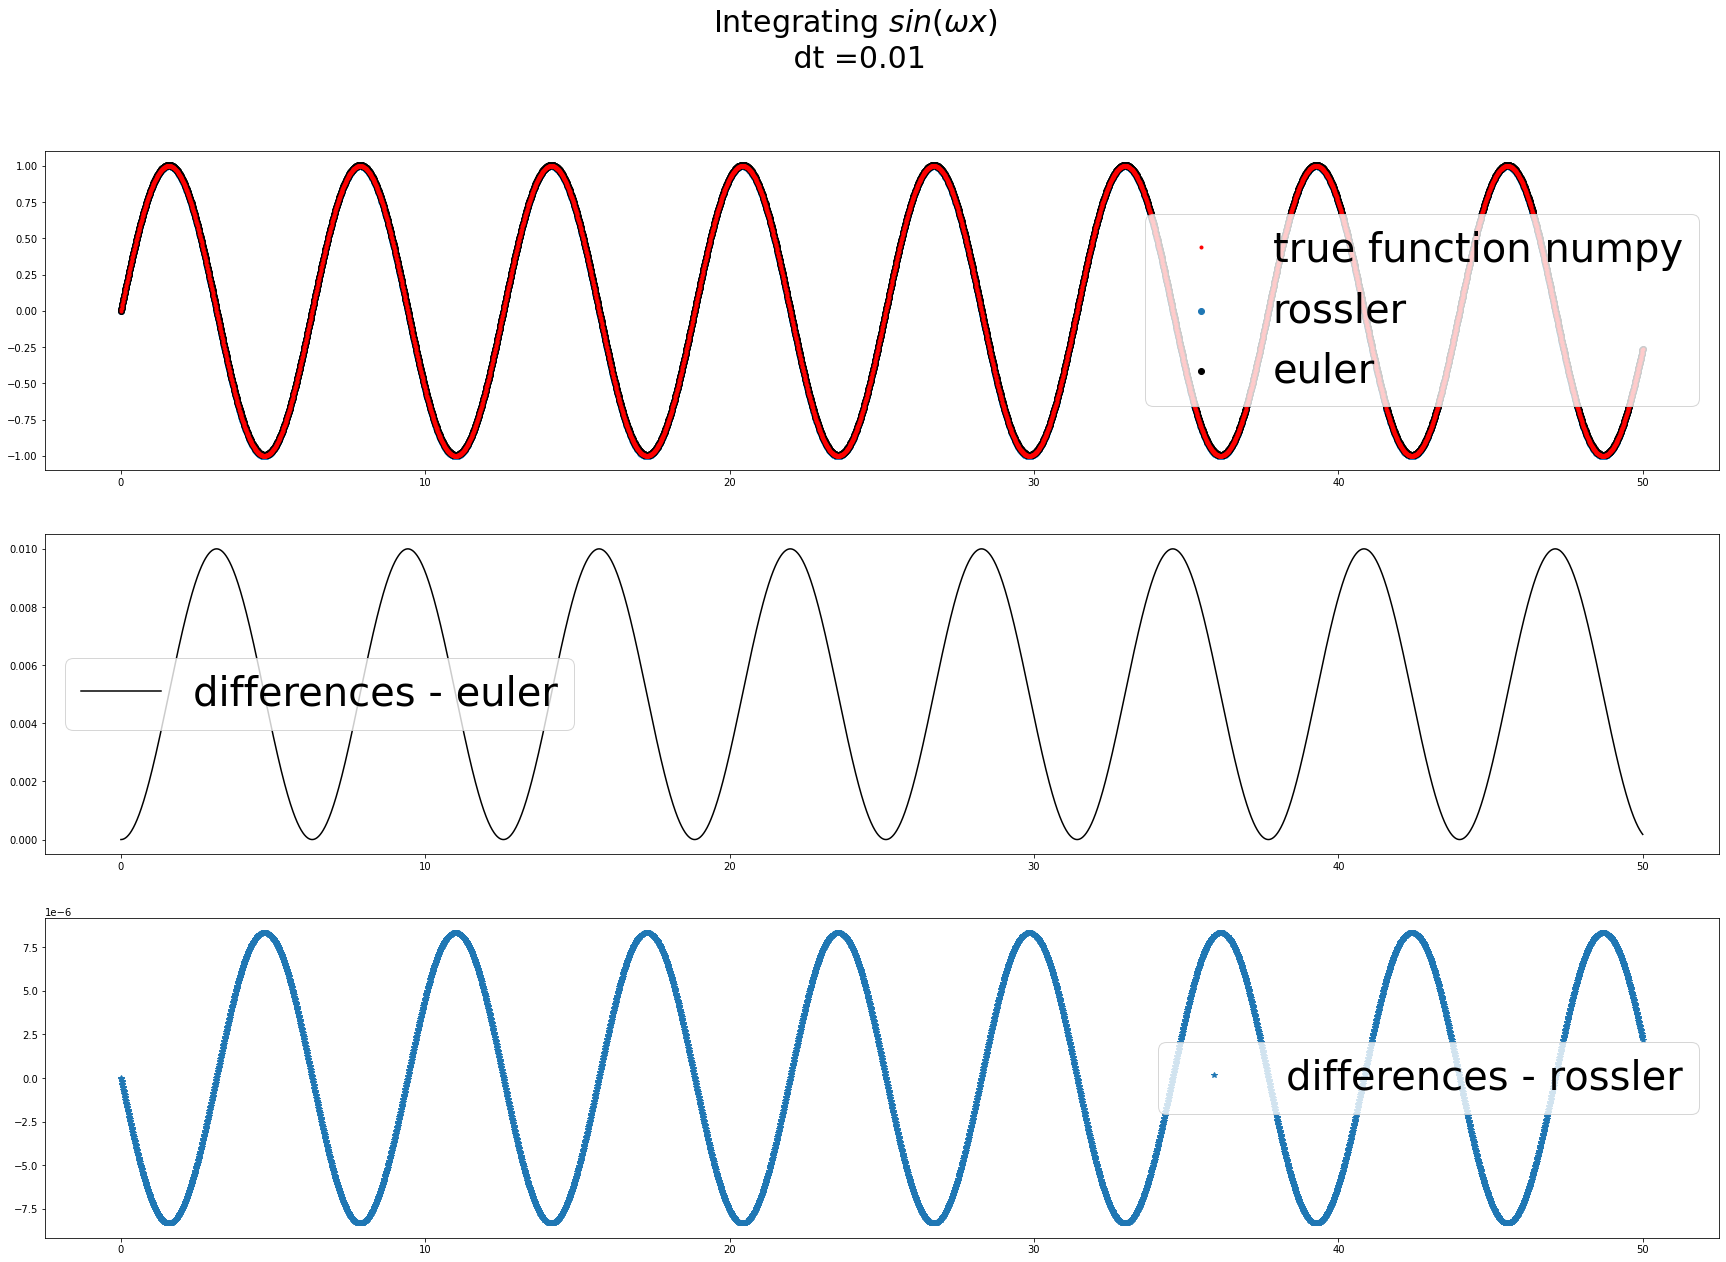

In [79]:
plt.figure(figsize=(30,20))
plt.suptitle('Integrating '+r'$sin(\omega x)$'+"\n dt ={}".format(dt),size=30)
plt.subplot(311)
plt.scatter(times, np.squeeze(sol), label="rossler")
plt.scatter(times,np.squeeze(solEu), label="euler", color="black")
plt.plot(times,np.sin(omega*times), '.', color="red", label="true function numpy")
plt.legend(prop={"size":40})

plt.subplot(312)
plt.plot(times,np.squeeze(solEu)-np.sin(omega*times) ,color="black",label="differences - euler")
plt.legend(prop={"size":40})
plt.subplot(313)
plt.plot(times,np.squeeze(sol)-np.sin(omega*times), '*',label="differences - rossler")
plt.legend(prop={"size":40})

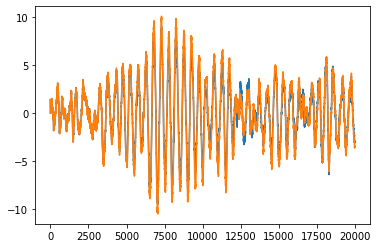

In [143]:
statesR, covs, signals, params = load_data(ppp=500, periods=40, method="rossler")
statesE, covs, signals, params = load_data(ppp=500, periods=40, method="euler")

plt.plot(statesR[:,0])
plt.plot(statesE[:,0])